<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/marketing/blob/main/recoding_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SpeechRecognition pydub
!pip install python-docx # Install the python-docx module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.9 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import time

# Load the audio file
audio_path = "fixed.m4a" # Changed to fixed file
audio = AudioSegment.from_file(audio_path, format="m4a")

# Convert the audio to a recognizable format for speech_recognition
audio.export("temp.wav", format="wav")

# Initialize recognizer
recognizer = sr.Recognizer()

# Load the wav file
with sr.AudioFile("temp.wav") as source:
    audio_data = recognizer.record(source)

# Recognize the speech in the audio
# Added try-except block to handle potential errors
try:
    text = recognizer.recognize_google(audio_data, language="ko-KR")
except sr.RequestError as e:
    print(f"Could not request results; {e}")
    # Implement retry logic with exponential backoff
    for i in range(3):  # Retry up to 3 times
        time.sleep(2 ** i)  # Wait 1, 2, 4 seconds
        try:
            text = recognizer.recognize_google(audio_data, language="ko-KR")
            break  # Break out of the loop if successful
        except sr.RequestError as e:
            print(f"Retry {i+1} failed; {e}")
    else:
        text = "Recognition failed after multiple retries."  # Set a default value if all retries fail

# Save the transcribed text to a Word document
from docx import Document # Import the Document class after installing the module

doc = Document()
doc.add_paragraph(text)
doc.save("transcribed_text.docx")

Could not request results; recognition connection failed: [Errno 32] Broken pipe
Retry 1 failed; recognition connection failed: [Errno 32] Broken pipe
Retry 2 failed; recognition connection failed: [Errno 32] Broken pipe
Retry 3 failed; recognition connection failed: [Errno 32] Broken pipe


In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import time
from docx import Document

def transcribe_audio_chunk(chunk, recognizer, language="ko-KR"):
    """Transcribes a single audio chunk."""
    with sr.AudioFile(chunk) as source:
        audio_data = recognizer.record(source)
    try:
        return recognizer.recognize_google(audio_data, language=language)
    except sr.UnknownValueError:
        print("Google could not understand the audio, trying Sphinx.")
        try:
            return recognizer.recognize_sphinx(audio_data, language=language)
        except (sr.UnknownValueError, sr.RequestError):
            return ""
    except sr.RequestError as e:
        print(f"Request failed with error: {e}")
        try:
            return recognizer.recognize_sphinx(audio_data, language=language)
        except (sr.UnknownValueError, sr.RequestError):
            return ""

def process_audio_file(audio_path, chunk_length_ms=60000):
    """Processes the audio file by splitting it into chunks and transcribing each chunk."""
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path, format="m4a")
    audio.export("temp.wav", format="wav")
    audio_chunks = AudioSegment.from_wav("temp.wav")

    chunks = [audio_chunks[i:i + chunk_length_ms] for i in range(0, len(audio_chunks), chunk_length_ms)]
    full_text = ""

    for i, chunk in enumerate(chunks):
        chunk_filename = f"chunk_{i}.wav"
        chunk.export(chunk_filename, format="wav")
        chunk_text = transcribe_audio_chunk(chunk_filename, recognizer)
        print(f"Chunk {i}: {chunk_text if chunk_text else 'No transcripts found'}")
        full_text += chunk_text + " "

    return full_text.strip()

# Main processing
audio_path = "fixed.m4a"
full_text = process_audio_file(audio_path)

# Save the transcribed full text from all chunks to a Word document
doc = Document()
doc.add_paragraph(full_text)
doc.save("transcribed_full_text.docx")


Chunk 0: 소비자 인사이트와 맞겠지 오늘은 소비자의 습관적 사고와 행동에 대해서 살펴보도록 하겠습니다 저희 화면에 보시는 메인 여부에서 나오는 바나나는 원래 한 사람은 제품 다들 아실 겁니다 아 최근에 아주 젊은 20대들은 모르실 수도 있는 제품인데요 그래도 한 번씩 보셨을 법한 그런 제품입니다 메인으로 나오는 바나나 우유입니다 자이 제품 한 2005년도 6년도 쯤에 출시된 제품인데요이 제품 처음 출시 됐을 때 소비자들의 반응이 어땠을까요 우와 맛있겠다 한번 먹어 봐야 되겠다 나는 반응이었어요 아니면 아 뭔가 이상하다라는 반응이 어땠을까요 투자 쪽이었는데 아마 여러분들도이 제품 보시면서 뭔가 이상하다는 생각들을 다들 가지고 계실 겁니다 자 모바일 이상할까요 무슨 색이어야 할까요 바로 노란색이어야 할 겁니다 바나나는 노란색이다
Google could not understand the audio, trying Sphinx.
Chunk 1: No transcripts found
Chunk 2: 바나나가 1도 안 들어간 그래서 바나나 우유가 아닌 맛만 한다라고 해서 바나나만 우유라는 브랜드명을 가지고 있는이 제품을 선택하게 됩니다 자 사실이 바나나맛 우유는
Chunk 3: 여러 가지 이제 성분을 넣어서 노란색을 만든 그러한 사실은 봄에는 그닥 좋지 않은 가공 바나나 우유라고 볼 수가 있습니다 자 그러니 매일유업에서이 바나나 문자들이 다 나온게 굉장히 좋아하는데이 안에 들어간 거 보니까 건강에 좋지 않을 것 같은 거죠 그리고 그 당시에 많은 소비자들이 이제 건강에 대한 많은 생각들을 하고 건강을 뭔가 지원해 줄 수 있는 여러 가지 제품들을 선택하기 시작합니다 그래서 건강에 도움이 되는 가공으로 만들어야 되겠다라고 해서 실
Chunk 4: 바나나는 알맹이를 우리가 먹는 거지 껍질을 먹는게 아니잖아요 그래서 그 갈매기에 하얀 속살을 넣어서 만든 굉장히 여기 보시면 천연 과제 올리라고 되어 있죠 색소 정형외과 천연 그 바나나 과즙을 넣어서 만든 건강에 좋은 우유로 만든

In [ ]:
!apt-get update
!apt-get install fonts-nanum -y

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from docx import Document

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pac

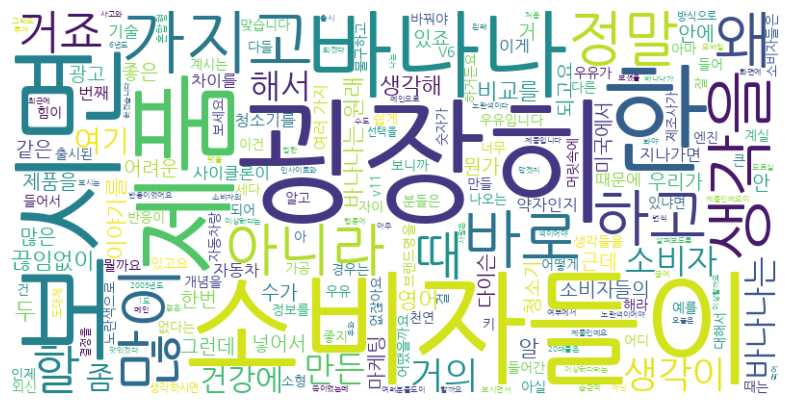

In [ ]:
# 기본 stopwords에 한국어 불용어 추가
stopwords = set(STOPWORDS)
korean_stopwords = {
    '그리고', '그래서', '그러나', '하지만', '이', '그', '저', '것', '수', '등', '등의', '또한',
    '더', '더욱', '만약', '물론', '아니면', '즉', '왜냐하면', '어떤', '이런', '저런', '그런',
    '저희', '우리', '너희', '너', '내', '나', '이제', '그럼', '그러면', '그러니까', '이렇게',
    '저렇게', '그렇게', '합니다', '합니다', '있는', '없는', '있다', '없다', '하게', '하는', '되다',
    '대한', '입니다', '있습니다', '이었', '입니다', '것을', '중에서', '이후', '하며', '하면',
    '하여', '하지', '하는데', '합니다', '겁니다', '뭐', '자', '됩니다','무슨','다'
    # 필요에 따라 더 추가 가능
}
stopwords.update(korean_stopwords)

# Load the text from the transcribed Word document
doc_path = "transcribed_full_text.docx"  # 실제 파일 경로를 입력하세요.
doc = Document(doc_path)

# Combine all the text from the document
full_text = ""
for para in doc.paragraphs:
    full_text += para.text + " "

# Generate the word cloud with a font that supports Korean
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    stopwords=stopwords,  # 불용어 적용
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 지정
    colormap="viridis"
).generate(full_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import re
from collections import Counter
# 정규 표현식을 사용하여 텍스트에서 불용어를 제외한 단어 추출
words = re.findall(r'\b\w+\b', full_text)
filtered_words = [word for word in words if word.lower() not in stopwords]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 가장 많이 언급된 단어 20개 추출
top_20_words = word_counts.most_common(20)

# 결과 출력
for word, freq in top_20_words:
    print(f'{word}: {freq}')

굉장히: 11
소비자들이: 9
바나나는: 8
한: 8
보시면: 8
제품: 7
바나나: 7
가지고: 7
생각을: 7
많이: 7
바로: 6
하고: 6
왜: 6
정말: 6
아니라: 6
원래: 5
때: 5
할: 5
거죠: 5
생각이: 5


1. UnknownValueError 처리:

구글 API가 음성을 인식하지 못했을 때 (UnknownValueError 발생), 바로 Sphinx로 다시 시도하도록 했습니다.

2. 오류 메시지 출력 및 대처:

각 오류에 대한 메시지를 출력하고, Sphinx로 대체하여 가능한 텍스트를 최대한 인식하도록 합니다.

3. 프로세스 중단 방지:

오류가 발생하더라도 전체 프로세스가 중단되지 않고, 다음 청크를 처리할 수 있도록 개선되었습니다.

In [ ]:
import speech_recognition as sr
from pydub import AudioSegment
import time
from docx import Document

def transcribe_audio_chunk(chunk_filename, recognizer, language="ko-KR"):
    """Transcribes a single audio chunk."""
    with sr.AudioFile(chunk_filename) as source:
        audio_data = recognizer.record(source)
    try:
        # Try Google Web Speech API
        return recognizer.recognize_google(audio_data, language=language)
    except sr.UnknownValueError:
        print(f"Google could not understand the audio in {chunk_filename}, trying Sphinx.")
        try:
            # Fallback to Sphinx if Google fails
            return recognizer.recognize_sphinx(audio_data, language=language)
        except (sr.UnknownValueError, sr.RequestError):
            return ""
    except sr.RequestError as e:
        print(f"Google request failed for {chunk_filename} with error: {e}. Trying Sphinx.")
        try:
            return recognizer.recognize_sphinx(audio_data, language=language)
        except (sr.UnknownValueError, sr.RequestError):
            return ""

def process_audio_file(audio_path, chunk_length_ms=60000):
    """Processes the audio file by splitting it into chunks and transcribing each chunk."""
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path, format="m4a")
    audio.export("temp.wav", format="wav")
    audio_chunks = AudioSegment.from_wav("temp.wav")

    chunks = [audio_chunks[i:i + chunk_length_ms] for i in range(0, len(audio_chunks), chunk_length_ms)]
    full_text = ""

    for i, chunk in enumerate(chunks):
        chunk_filename = f"chunk_{i}.wav"
        chunk.export(chunk_filename, format="wav")
        chunk_text = transcribe_audio_chunk(chunk_filename, recognizer)
        if chunk_text:
            print(f"Chunk {i}: {chunk_text}")
        else:
            print(f"No valid transcripts found for chunk {i}")
        full_text += chunk_text + " "

    return full_text.strip()

# Main processing
audio_path = "fixed.m4a"
full_text = process_audio_file(audio_path)

# Save the transcribed full text from all chunks to a Word document
doc = Document()
doc.add_paragraph(full_text)
doc.save("transcribed_full_text2.docx")


Chunk 0: 소비자 인사이트와 맞겠지 오늘은 소비자의 습관적 사고와 행동에 대해서 살펴보도록 하겠습니다 저희 화면에 보시는 메인 여부에서 나오는 바나나는 원래 한 사람은 제품 다들 아실 겁니다 아 최근에 아주 젊은 20대들은 모르실 수도 있는 제품인데요 그래도 한 번씩 보셨을 법한 그런 제품입니다 메인으로 나오는 바나나 우유입니다 자이 제품 한 2005년도 6년도 쯤에 출시된 제품인데요이 제품 처음 출시 됐을 때 소비자들의 반응이 어땠을까요 우와 맛있겠다 한번 먹어 봐야 되겠다 나는 반응이었어요 아니면 아 뭔가 이상하다라는 반응이 어땠을까요 투자 쪽이었는데 아마 여러분들도이 제품 보시면서 뭔가 이상하다는 생각들을 다들 가지고 계실 겁니다 자 모바일 이상할까요 무슨 색이어야 할까요 바로 노란색이어야 할 겁니다 바나나는 노란색이다
Google could not understand the audio in chunk_1.wav, trying Sphinx.
No valid transcripts found for chunk 1
Chunk 2: 바나나가 1도 안 들어간 그래서 바나나 우유가 아닌 맛만 한다라고 해서 바나나만 우유라는 브랜드명을 가지고 있는이 제품을 선택하게 됩니다 자 사실이 바나나맛 우유는
Chunk 3: 여러 가지 이제 성분을 넣어서 노란색을 만든 그러한 사실은 봄에는 그닥 좋지 않은 가공 바나나 우유라고 볼 수가 있습니다 자 그러니 매일유업에서이 바나나 문자들이 다 나온게 굉장히 좋아하는데이 안에 들어간 거 보니까 건강에 좋지 않을 것 같은 거죠 그리고 그 당시에 많은 소비자들이 이제 건강에 대한 많은 생각들을 하고 건강을 뭔가 지원해 줄 수 있는 여러 가지 제품들을 선택하기 시작합니다 그래서 건강에 도움이 되는 가공으로 만들어야 되겠다라고 해서 실
Chunk 4: 바나나는 알맹이를 우리가 먹는 거지 껍질을 먹는게 아니잖아요 그래서 그 갈매기에 하얀 속살을 넣어서 만든 굉장히 여기 보시면 천연 과제 올리라고 되어 있죠 색소 정형외과 천연 그 바나나 

1. 오류 처리 강화:

각 청크의 텍스트를 인식하는 과정에서 UnknownValueError가 발생하면, Sphinx를 사용하여 다시 시도합니다.
오류 발생 시에도 프로그램이 중단되지 않도록 처리하여 가능한 많은 텍스트를 추출합니다.

2. 프로세스 중단 방지:

구글 API가 실패해도, Sphinx로 시도하고, 그마저 실패할 경우 해당 청크를 건너뛰며 다음 청크로 넘어갑니다.

3. 청크별로 분리된 처리:

오디오 파일을 작은 청크로 분리하여 개별적으로 처리하므로, 특정 청크에서 오류가 발생해도 전체 프로세스에 영향을 미치지 않습니다.

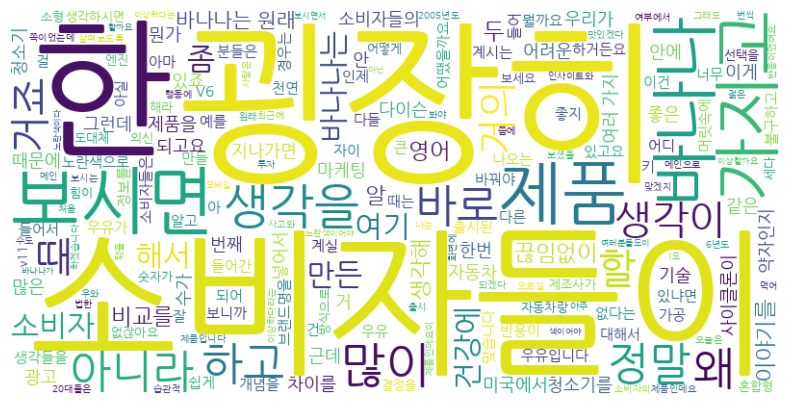

In [ ]:
# 기본 stopwords에 한국어 불용어 추가
stopwords = set(STOPWORDS)
korean_stopwords = {
    '그리고', '그래서', '그러나', '하지만', '이', '그', '저', '것', '수', '등', '등의', '또한',
    '더', '더욱', '만약', '물론', '아니면', '즉', '왜냐하면', '어떤', '이런', '저런', '그런',
    '저희', '우리', '너희', '너', '내', '나', '이제', '그럼', '그러면', '그러니까', '이렇게',
    '저렇게', '그렇게', '합니다', '합니다', '있는', '없는', '있다', '없다', '하게', '하는', '되다',
    '대한', '입니다', '있습니다', '이었', '입니다', '것을', '중에서', '이후', '하며', '하면',
    '하여', '하지', '하는데', '합니다', '겁니다', '뭐', '자', '됩니다','무슨','다'
    # 필요에 따라 더 추가 가능
}
stopwords.update(korean_stopwords)

# Load the text from the transcribed Word document
doc_path = "transcribed_full_text2.docx"  # 실제 파일 경로를 입력하세요.
doc = Document(doc_path)

# Combine all the text from the document
full_text = ""
for para in doc.paragraphs:
    full_text += para.text + " "

# Generate the word cloud with a font that supports Korean
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    stopwords=stopwords,  # 불용어 적용
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 지정
    colormap="viridis"
).generate(full_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import re
from collections import Counter
# 정규 표현식을 사용하여 텍스트에서 불용어를 제외한 단어 추출
words = re.findall(r'\b\w+\b', full_text)
filtered_words = [word for word in words if word.lower() not in stopwords]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 가장 많이 언급된 단어 20개 추출
top_20_words = word_counts.most_common(20)

# 결과 출력
for word, freq in top_20_words:
    print(f'{word}: {freq}')

굉장히: 11
소비자들이: 9
바나나는: 8
한: 8
보시면: 8
제품: 7
바나나: 7
가지고: 7
생각을: 7
많이: 7
바로: 6
하고: 6
왜: 6
정말: 6
아니라: 6
원래: 5
때: 5
할: 5
거죠: 5
생각이: 5
